In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [5]:
class SimplePerceptron(nn.Module):
    def __init__(self):
        super(SimplePerceptron, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
model = SimplePerceptron()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
num_epochs = 5

for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.3083
Epoch [2/5], Loss: 0.2463
Epoch [3/5], Loss: 0.3787
Epoch [4/5], Loss: 0.3552
Epoch [5/5], Loss: 0.3525


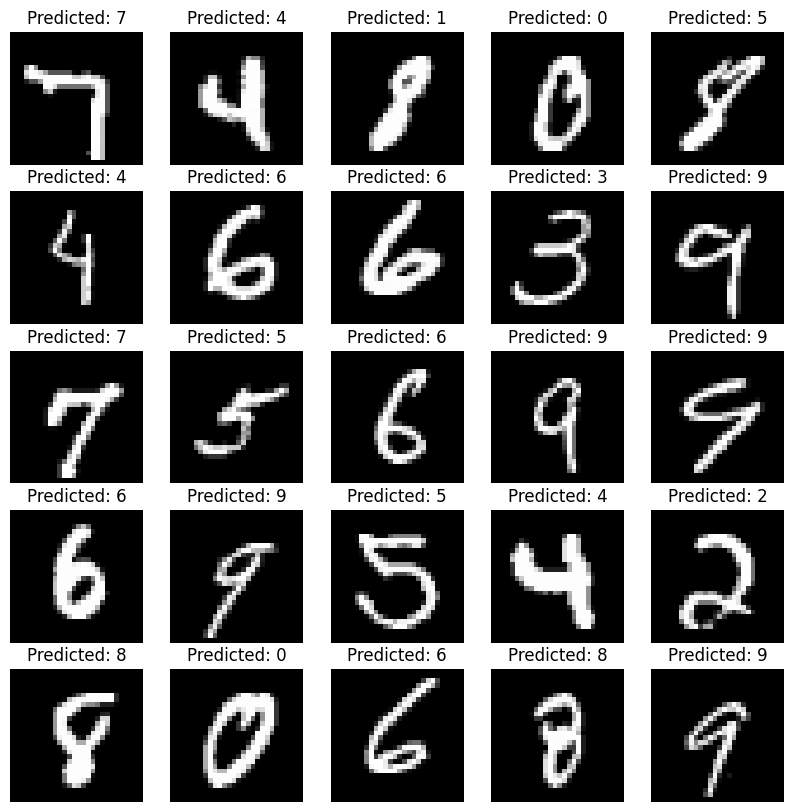

In [8]:
def visualize_predictions(model, data_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(data_loader))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)


        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.imshow(images[i][0], cmap='gray')
            plt.title(f'Predicted: {predicted[i].item()}')
            plt.axis('off')
        plt.show()

visualize_predictions(model, train_loader)